In [1]:
# Week 1–2: Data Collection, Preprocessing, and Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cancer_df = pd.read_csv("../data/cancer_reg.csv")
household_df = pd.read_csv("../data/avg-household-size.csv")

In [4]:
cancer_df.head()

,index,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
household_df.head()

,index,statefips,countyfips,avghouseholdsize,geography
0,0,2,13,2.43,"Aleutians East Borough, Alaska"
1,1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,2,20,2.77,"Anchorage Municipality, Alaska"
3,3,2,50,3.86,"Bethel Census Area, Alaska"
4,4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [6]:
# Clean column names
cancer_df.columns = cancer_df.columns.str.strip().str.lower()
household_df.columns = household_df.columns.str.strip().str.lower()

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    3047 non-null   int64  
 1   avganncount              3047 non-null   float64
 2   avgdeathsperyear         3047 non-null   int64  
 3   target_deathrate         3047 non-null   float64
 4   incidencerate            3047 non-null   float64
 5   medincome                3047 non-null   int64  
 6   popest2015               3047 non-null   int64  
 7   povertypercent           3047 non-null   float64
 8   studypercap              3047 non-null   float64
 9   binnedinc                3047 non-null   object 
 10  medianage                3047 non-null   float64
 11  medianagemale            3047 non-null   float64
 12  medianagefemale          3047 non-null   float64
 13  geography                3047 non-null   object 
 14  percentmarried          

In [8]:
household_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             3220 non-null   int64  
 1   statefips         3220 non-null   int64  
 2   countyfips        3220 non-null   int64  
 3   avghouseholdsize  3220 non-null   float64
 4   geography         3220 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 125.9+ KB


In [9]:
# Merge on 'geography'
merged_df = pd.merge(cancer_df, household_df[['geography', 'avghouseholdsize']], on='geography', how='left')

In [10]:
# Extract 'county' and 'state' columns
merged_df[['county', 'state']] = merged_df['geography'].str.split(',', expand=True)
merged_df['state'] = merged_df['state'].str.strip()

In [11]:
# 2. Basic Cleaning
# Remove columns not useful for our study scope
columns_to_drop = [
    'index', 'studypercap', 'percentmarried', 'pctsomecol18_24',
    'pctprivatecoveragealone', 'pctmarriedhouseholds', 'pctotherrace'
]
merged_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [12]:
# Remove rows with implausible age entries
merged_df = merged_df[merged_df['medianage'] <= 100]

In [13]:
# Drop missing values
missing_info = merged_df.isnull().sum()
print("Missing values before drop:\n", missing_info[missing_info > 0])
merged_df.dropna(inplace=True)
print("\nData shape after cleaning:", merged_df.shape)

Missing values before drop:
 pctemployed16_over    149
dtype: int64

Data shape after cleaning: (2868, 30)


In [14]:
# 3. Descriptive Statistics
# ============================
print(merged_df[['medincome', 'povertypercent', 'avgdeathsperyear', 'incidencerate']].describe())

           medincome  povertypercent  avgdeathsperyear  incidencerate
count    2868.000000     2868.000000       2868.000000    2868.000000
mean    47001.026499       16.919596        187.737796     447.909026
std     12062.328885        6.435136        515.584797      52.790226
min     22640.000000        3.200000          3.000000     201.300000
25%     38751.500000       12.175000         28.000000     420.300000
50%     45141.500000       15.900000         61.000000     453.549422
75%     52455.000000       20.500000        145.250000     480.500000
max    125635.000000       47.400000      14010.000000    1014.200000


In [15]:
# 4. Visual Exploration

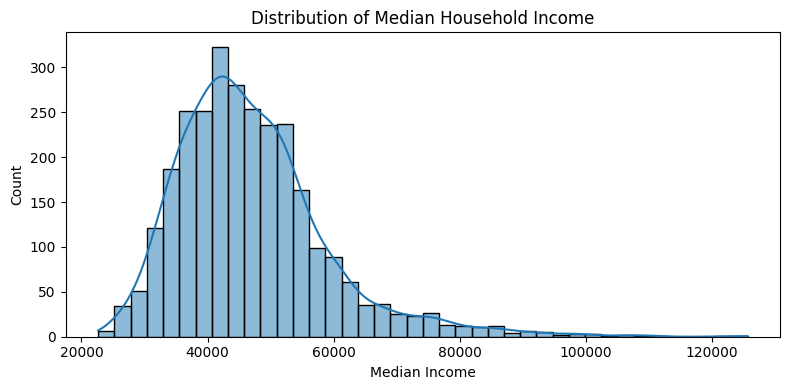

In [16]:
# Income distribution
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['medincome'], bins=40, kde=True)
plt.title("Distribution of Median Household Income")
plt.xlabel("Median Income")
plt.tight_layout()
plt.show()

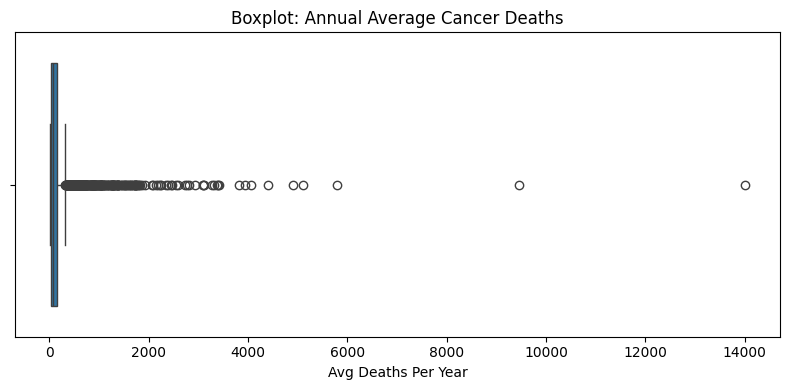

In [17]:
# Cancer death rate
plt.figure(figsize=(8, 4))
sns.boxplot(x=merged_df['avgdeathsperyear'])
plt.title("Boxplot: Annual Average Cancer Deaths")
plt.xlabel("Avg Deaths Per Year")
plt.tight_layout()
plt.show()

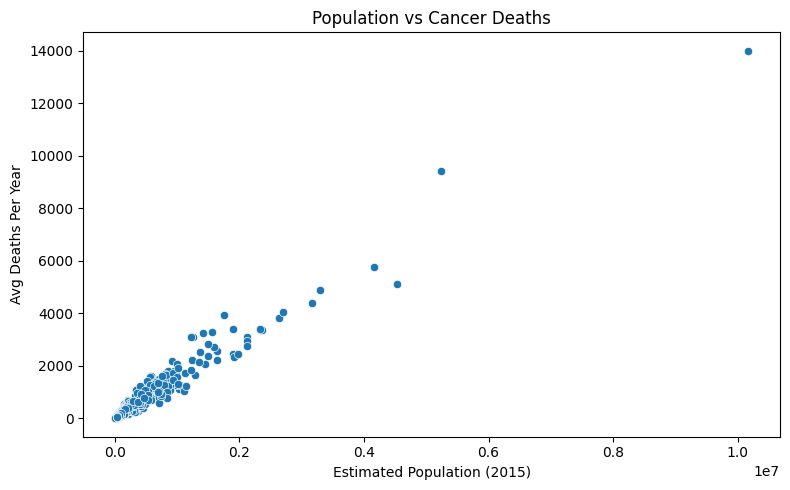

In [18]:
# Population vs Deaths
plt.figure(figsize=(8, 5))
sns.scatterplot(x='popest2015', y='avgdeathsperyear', data=merged_df)
plt.title("Population vs Cancer Deaths")
plt.xlabel("Estimated Population (2015)")
plt.ylabel("Avg Deaths Per Year")
plt.tight_layout()
plt.show()

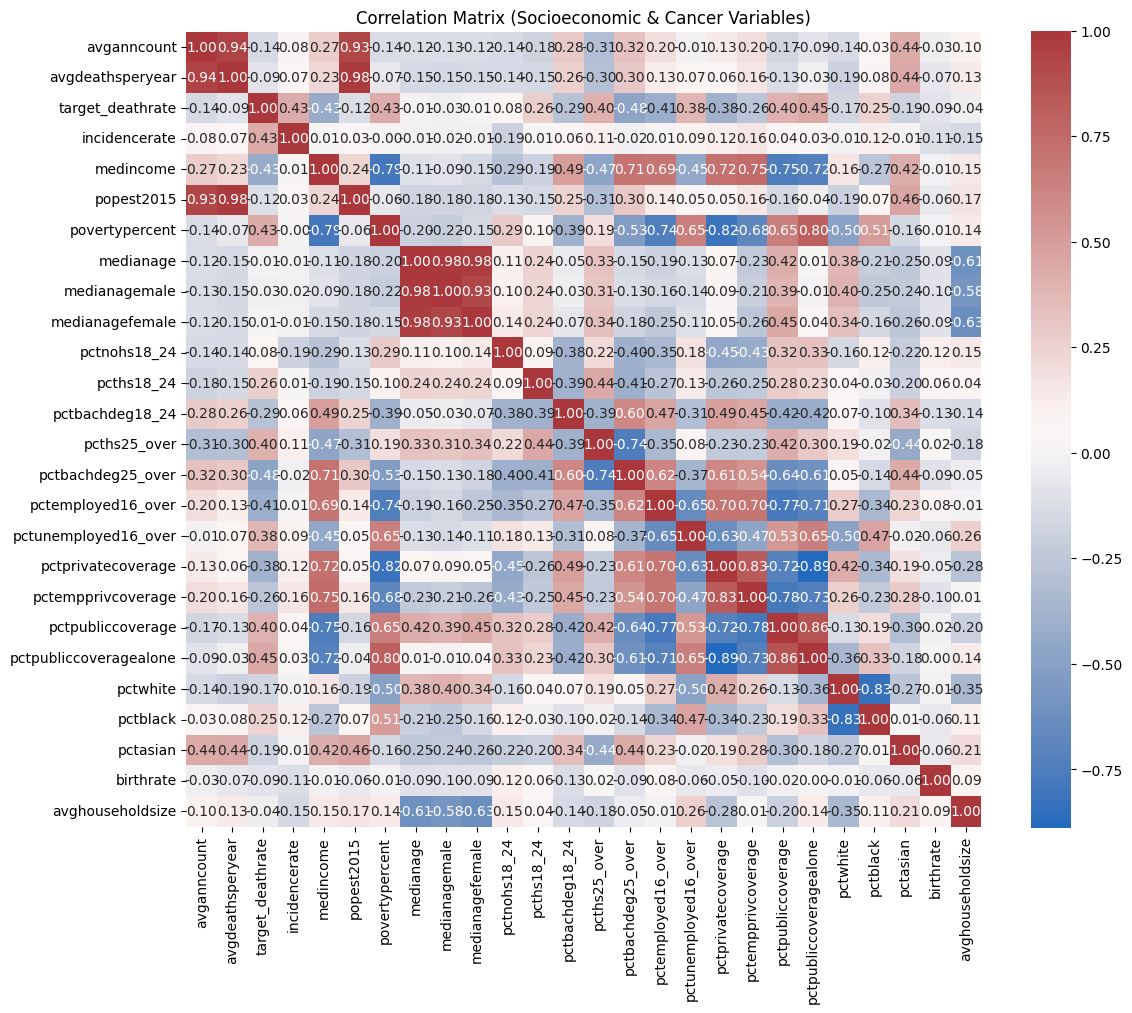

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = merged_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='vlag', annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix (Socioeconomic & Cancer Variables)")
plt.tight_layout()
plt.show()

In [20]:
# Save processed file for modeling
merged_df.to_csv("../data/cleaned_data_week1_2.csv", index=False)